<a href="https://colab.research.google.com/github/priya606/PROJECTS/blob/main/Convolutional_NN(DL_4)_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf #frame work created by google for dl models also helps to create large scale neural nw's with many layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras #it makes implementation of nn easy it also supports multiple backend neural network computation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
mnist=tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


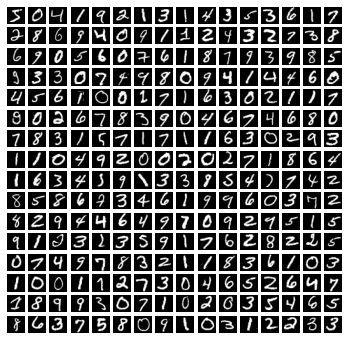

In [ ]:
plt.figure(figsize=(6,6))
for i in range(256):
  plt.subplot(16,16,i+1)
  plt.axis('off')
  plt.imshow(xtrain[i],cmap='gray')

In [ ]:
xtrain=xtrain.reshape([60000, 28, 28,1])
xtest=xtest.reshape([10000,28,28,1])

In [ ]:
from keras.utils.np_utils import to_categorical
ytrain=to_categorical(ytrain,num_classes=10)
ytest=to_categorical(ytest,num_classes=10)

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False


)
train_datagen.fit(xtrain)
train_generator=train_datagen.flow(xtrain,ytrain,batch_size=256)

In [ ]:
val_datagen=ImageDataGenerator(rescale=1/255)
val_datagen.fit(xtest)
val_generator=val_datagen.flow(xtest,ytest)

In [ ]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(5,5),activation='relu',padding='same',input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation='relu'),
      tf.keras.layers.Dense(10,activation='softmax') #softmax converts into probabilities
])

In [ ]:
5*5*32+32

832

In [ ]:
3*3*32*64+64

18496

In [ ]:
3*3*64*128+128

73856

In [ ]:
256*128+256

33024

In [ ]:
20*256+20

5140

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,
                 validation_data=val_generator,
                 epochs=40,
                 verbose=1
)

Epoch 1/40
235/235 [==============================] - 33s 94ms/step - loss: 2.2686 - accuracy: 0.2924 - val_loss: 2.1895 - val_accuracy: 0.5360
Epoch 2/40
235/235 [==============================] - 22s 94ms/step - loss: 1.8310 - accuracy: 0.5472 - val_loss: 0.8827 - val_accuracy: 0.7745
Epoch 3/40
235/235 [==============================] - 22s 95ms/step - loss: 0.9112 - accuracy: 0.7128 - val_loss: 0.4088 - val_accuracy: 0.8825
Epoch 4/40
235/235 [==============================] - 22s 94ms/step - loss: 0.5700 - accuracy: 0.8219 - val_loss: 0.2563 - val_accuracy: 0.9254
Epoch 5/40
235/235 [==============================] - 22s 94ms/step - loss: 0.4076 - accuracy: 0.8752 - val_loss: 0.1770 - val_accuracy: 0.9507
Epoch 6/40
235/235 [==============================] - 22s 94ms/step - loss: 0.3208 - accuracy: 0.9032 - val_loss: 0.1403 - val_accuracy: 0.9586
Epoch 7/40
235/235 [==============================] - 22s 94ms/step - loss: 0.2723 - accuracy: 0.9171 - val_loss: 0.1234 - val_accuracy:

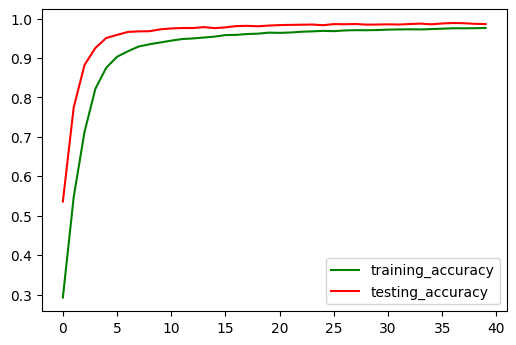

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.figure(dpi=100)
plt.plot(acc,color='green',label='training_accuracy')
plt.plot(val_acc,color='red',label='testing_accuracy')
plt.legend()

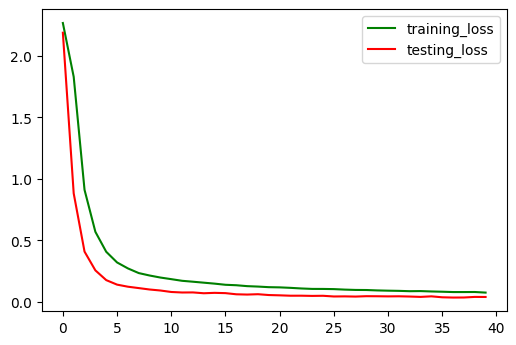

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.figure(dpi=100)
plt.plot(loss,color='green',label='training_loss')
plt.plot(val_loss,color='red',label='testing_loss')
plt.legend()

In [ ]:
model.predict(xtrain[0:1])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

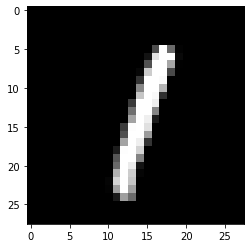

In [ ]:
plt.imshow(xtest[5].reshape([28,28]),cmap='gray')

In [ ]:
df=np.argmax(model.predict(xtrain[0:25]),axis=1)
df

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1])

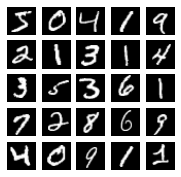

In [ ]:
plt.figure(figsize=(3,3))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.imshow(xtrain[i].reshape([28,28]),cmap='gray')

In [ ]:
df2=np.argmax(model.predict(xtest[0:25]),axis=1)
df2

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4])

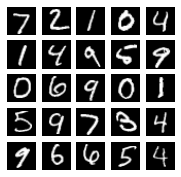

In [ ]:
plt.figure(figsize=(3,3))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.imshow(xtest[i].reshape([28,28]),cmap='gray')

In [ ]:
model.predict(xtest[0:1])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

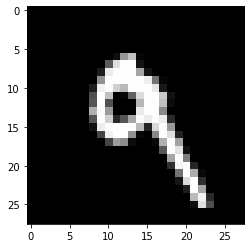

In [ ]:
plt.imshow(xtest[7].reshape([28,28]),cmap='gray')

In [ ]:
def detect_digit(x):
  pred=np.argmax(model.predict(x),axis=1)
  print('the given digit is:',pred[0])
  plt.figure()
  plt.axis('off')
  plt.imshow(x.reshape([28,28]),cmap='gray')

In [ ]:
detect_digit(xtest[11:15])

In [ ]:
from sklearn.metrics import confusion_matrix
pred_test=np.argmax(model.predict(xtest),axis=1)
ytest=np.argmax(ytest,axis=1)
cm=confusion_matrix(ytest,pred_test)

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization


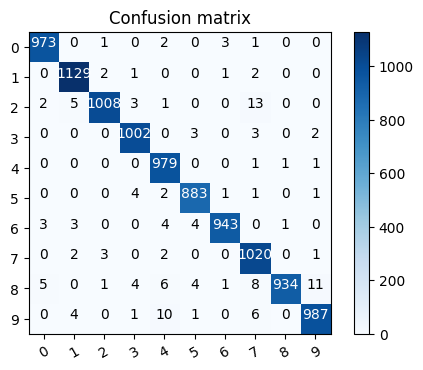

In [ ]:
plt.figure(dpi=100)
classes=[0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(cm,classes)